## This Jupyter notebook runs our implementation on Q learning and Deep Q learning and plots the results


In [57]:
%load_ext autoreload

%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
from tic_env import TictactoeEnv, OptimalPlayer
import QLearning
import Deep_QLearning
import test_functions

import importlib
importlib.reload(QLearning)
importlib.reload(Deep_QLearning)
importlib.reload(test_functions)


random.seed(10)
env = TictactoeEnv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Q-Learning
## 2.1 Learning from experts
### Question 1 

In [82]:
nb_play = 20000
exploration_levels = [0, 0.1, 0.2, 0.3,0.5]
average_reward = []
recap_rewards1 = []
Turns = np.array(['X','O'])
rewards=0

for exploration_level in exploration_levels:
    print("testing now with exploration level=", exploration_level)
    Qplayer = QLearning.QLearningPlayer(exploration_level=exploration_level)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([i%2, (i+1)%2])]
        Qplayer.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = Qplayer.act(grid, train_mode=True)
            grid, end, winner = env.step(move, print_grid=False)
            if end:
                if winner==Qplayer.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0                  
                Qplayer.last_update(reward)
                env.reset()
                break
        rewards += reward
        
        #every 250 games, average the rewards and store them
        if not k%250 and k is not 0 :
            average_reward.append(rewards/250)
            rewards=0

        if not k%2000:
            print('epoch: '+str(k))
    
    recap_rewards1.append(average_reward) 
    average_reward=[]

testing now with exploration level= 0
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with exploration level= 0.2
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with exploration level= 0.3
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with exploration level= 0.5
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000


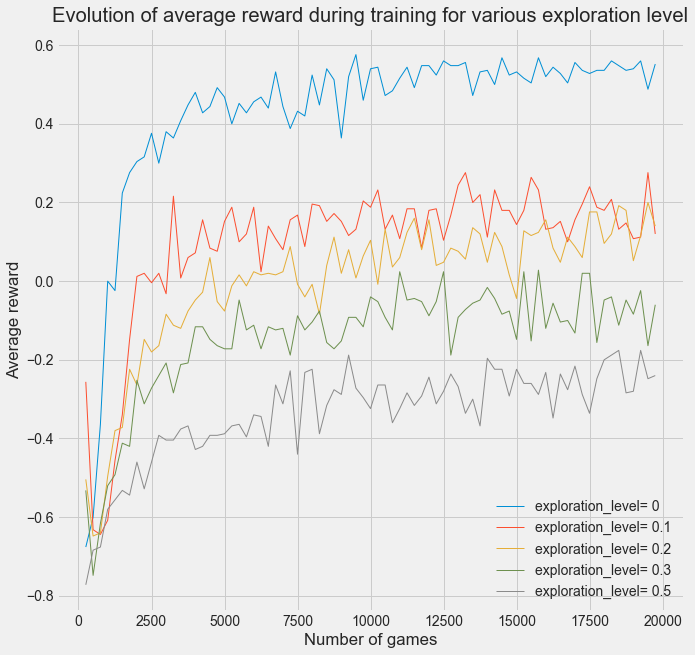

In [174]:
# Plot the results
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.style.use('fivethirtyeight')
plt.title('Evolution of average reward during training for various exploration level')

x = np.arange(len(recap_rewards1[1]))*250+250
for recap_reward, exploration_level in zip(recap_rewards1, exploration_levels):
    plt.plot(x, recap_reward, label = "exploration_level= "+str(exploration_level), linewidth=1)
    
plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.legend()
plt.show()

## 2.1.1 Decreasing exploration
### Question 2


In [85]:
nb_play = 20000
decreasing_exploration_rates = [1, 250, 1000, 5000,10000, 20000, 40000]
average_reward = []
recap_rewards2 = []
Turns = np.array(['X','O'])
rewards=0

for decreasing_exploration_rate in decreasing_exploration_rates:
    print("testing now with decreasing exploration rate=", decreasing_exploration_rate)
    Qplayer = QLearning.QLearningPlayer(decreasing_exploration_rate = decreasing_exploration_rate, 
                                        decreasing_exploration_flag = True)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([i%2, (i+1)%2])]
        Qplayer.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = Qplayer.act(grid, train_mode=True)
            grid, end, winner = env.step(move, print_grid=False)
            if end:
                if winner==Qplayer.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0                  
                Qplayer.last_update(reward)
                env.reset()
                break
        rewards += reward
        
        #every 250 games, average the rewards and store them
        if not k%250 and k is not 0 :
            average_reward.append(rewards/250)
            rewards=0

        if not k%2000:
            print('epoch: '+str(k))
    
    recap_rewards2.append(average_reward) 
    average_reward=[]

testing now with decreasing exploration rate= 1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 1000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 5000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 10000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 20000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epo

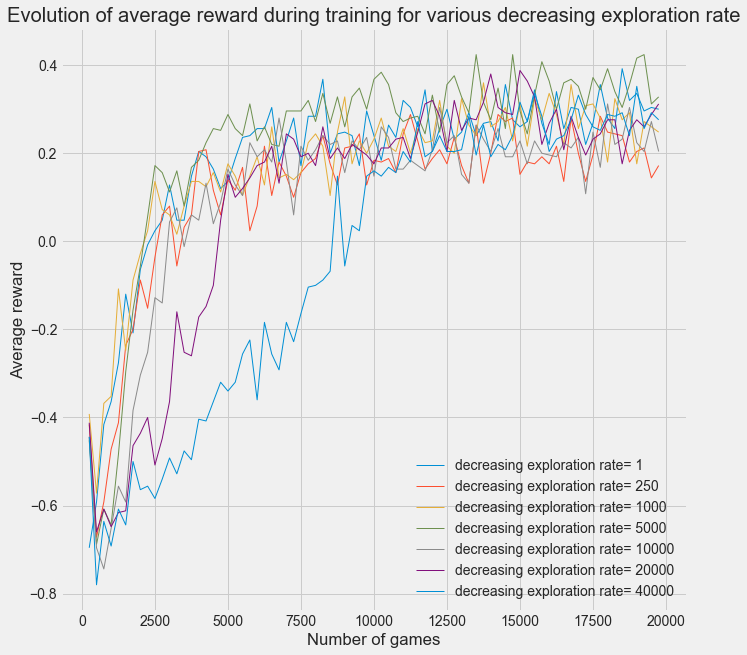

In [173]:
# Plot the results
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.style.use('fivethirtyeight')
plt.title('Evolution of average reward during training for various decreasing exploration rate')

x = np.arange(len(recap_rewards2[1]))*250+250
for recap_reward, decreasing_exploration_rate in zip(recap_rewards2, decreasing_exploration_rates):
    plt.plot(x, recap_reward, label = "decreasing exploration rate= "+str(decreasing_exploration_rate), linewidth=1)
    
plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.legend()
plt.show()

### Question 3

In [145]:
nb_play = 20000
decreasing_exploration_rates = [1, 250, 1000, 5000,10000, 20000, 40000]
Mopt = []
Mrand = []
recap_Mopt = []
recap_Mrand = []
Turns = np.array(['X','O'])

for decreasing_exploration_rate in decreasing_exploration_rates:
    print("testing now with decreasing exploration rate=", decreasing_exploration_rate)
    Qplayer = QLearning.QLearningPlayer(decreasing_exploration_rate = decreasing_exploration_rate, 
                                        decreasing_exploration_flag = True)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        Qplayer.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = Qplayer.act(grid, train_mode=True)
            grid, end, winner = env.step(move, print_grid=False)
            if end:
                if winner==Qplayer.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0                  
                Qplayer.last_update(reward)
                env.reset()
                break        
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_policy(Qplayer, expert_exploration_level=0))
            Mrand.append(test_functions.test_policy(Qplayer, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt.append(Mopt) 
    recap_Mrand.append(Mrand) 

    Mopt=[]
    Mrand=[]

testing now with decreasing exploration rate= 1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 1000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 5000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 10000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 20000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epo

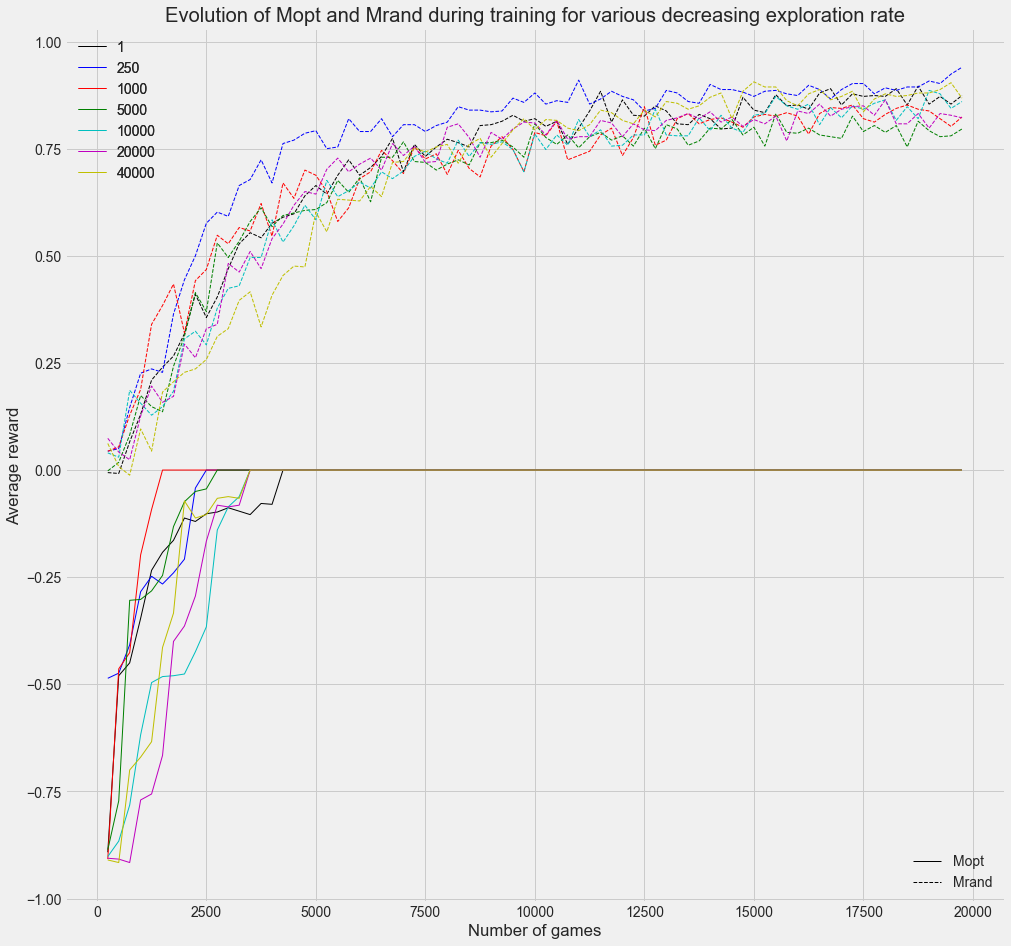

In [149]:
# Plot the results
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training for various decreasing exploration rate')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt[1]))*250+250
for Mopt, Mrand in zip(recap_Mopt, recap_Mrand):
#     pyplot.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], decreasing_exploration_rates, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()


## 2.1.2 Good experts and bad experts
### Question 4

In [148]:
nb_play = 20000
optimal_player_epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
decreasing_exploration_rate = 250
Mopt = []
Mrand = []
recap_Mopt4 = []
recap_Mrand4 = []
Turns = np.array(['X','O'])

for optimal_player_epsilon in optimal_player_epsilons:
    print("testing now with optimal opponant's epsilon value =", optimal_player_epsilon)
    Qplayer = QLearning.QLearningPlayer(decreasing_exploration_rate = decreasing_exploration_rate, 
                                        decreasing_exploration_flag = True)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        Qplayer.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=optimal_player_epsilon, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = Qplayer.act(grid, train_mode=True)
            grid, end, winner = env.step(move, print_grid=False)
            if end:
                if winner==Qplayer.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0                  
                Qplayer.last_update(reward)
                env.reset()
                break        
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_policy(Qplayer, expert_exploration_level=0))
            Mrand.append(test_functions.test_policy(Qplayer, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt4.append(Mopt) 
    recap_Mrand4.append(Mrand) 

    Mopt=[]
    Mrand=[]

testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 

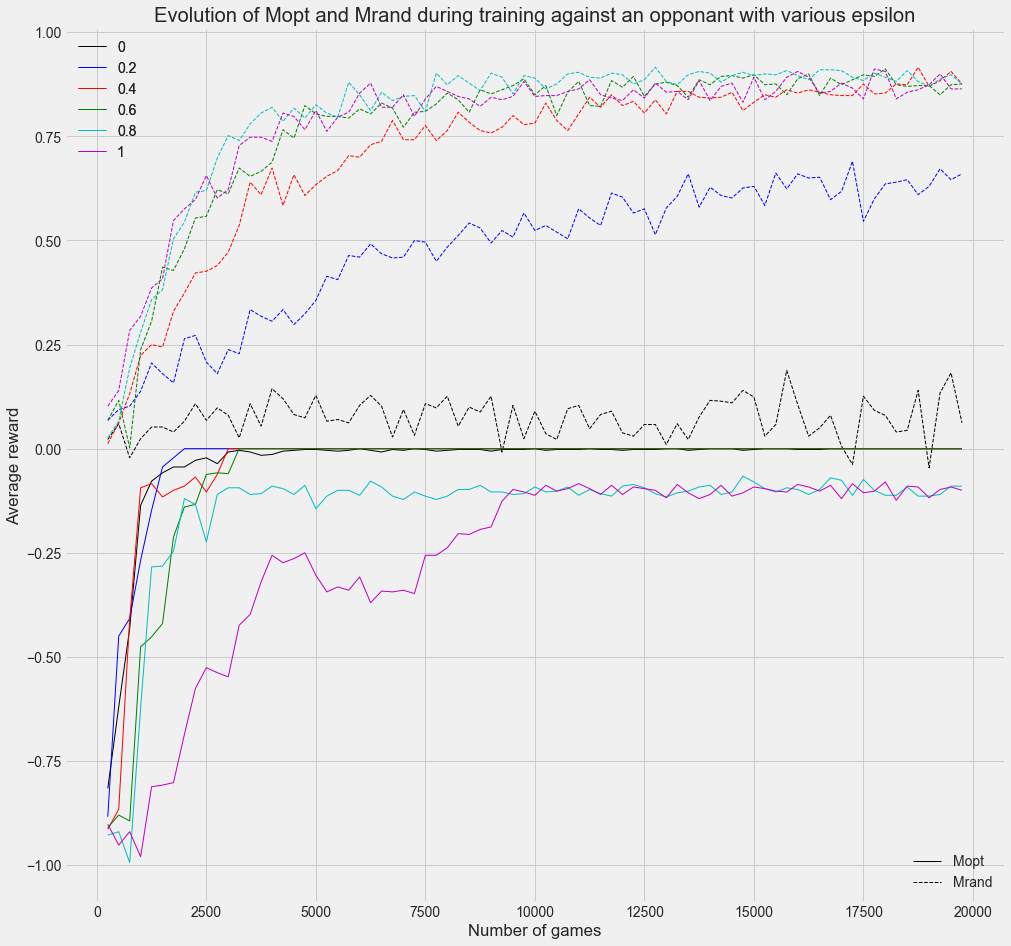

In [175]:
# Plot the results
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training against an opponant with various epsilon')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt4[1]))*250+250
for Mopt, Mrand in zip(recap_Mopt4, recap_Mrand4):
#     pyplot.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], optimal_player_epsilons, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()


### Question 5

In [13]:
maxi = []
for l in recap_Mopt4:
    maxi.append(max(l))
    
print("Max value of Mopt acheived after 20000 games: ",max(maxi))

maxi = []
for l in recap_Mrand4:
    maxi.append(max(l))
print("Max value of Mrand acheived after 20000 games: ",max(maxi))

NameError: name 'recap_Mopt4' is not defined

## 2.2 Learning by self-practice
### Question 7

In [14]:
nb_play = 20000
epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
Mopt = []
Mrand = []
recap_Mopt7 = []
recap_Mrand7 = []

for epsilon in epsilons:
    print("testing now with different epsilon values for self playing =", epsilon)
    Qplayer = QLearning.QLearningSelf_Player(exploration_level = epsilon)
    for k in range(nb_play):
        grid, _, __ = env.observe()
        for j in range(9):
                move = Qplayer.act(grid,env.current_player, train_mode=True)
    
                grid, end, winner = env.step(move, print_grid=False)
    
                if end:
                    if winner=='X':
                        Qplayer.last_update(1,'X')
                        Qplayer.last_update(-1,'O')
                    elif winner=='O':
                        Qplayer.last_update(-1,'X')
                        Qplayer.last_update(1,'O')
                    else: 
                        Qplayer.last_update(0,'X')
                        Qplayer.last_update(0,'O')
                        
                    env.reset()
                    break     
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_self_playing_policy(Qplayer, expert_exploration_level=0))
            Mrand.append(test_functions.test_self_playing_policy(Qplayer, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt7.append(Mopt) 
    recap_Mrand7.append(Mrand) 

    Mopt=[]
    Mrand=[]

<>:33: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:33: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Usuario\AppData\Local\Temp/ipykernel_19748/884301922.py:33: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not k%250 and k is not 0 :


testing now with different epsilon values for self playing = 0
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with different epsilon values for self playing = 0.2
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with different epsilon values for self playing = 0.4
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with different epsilon values for self playing = 0.6
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with different epsilon values for self playing = 0.8
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with different epsilon values for self playing = 1
epoc

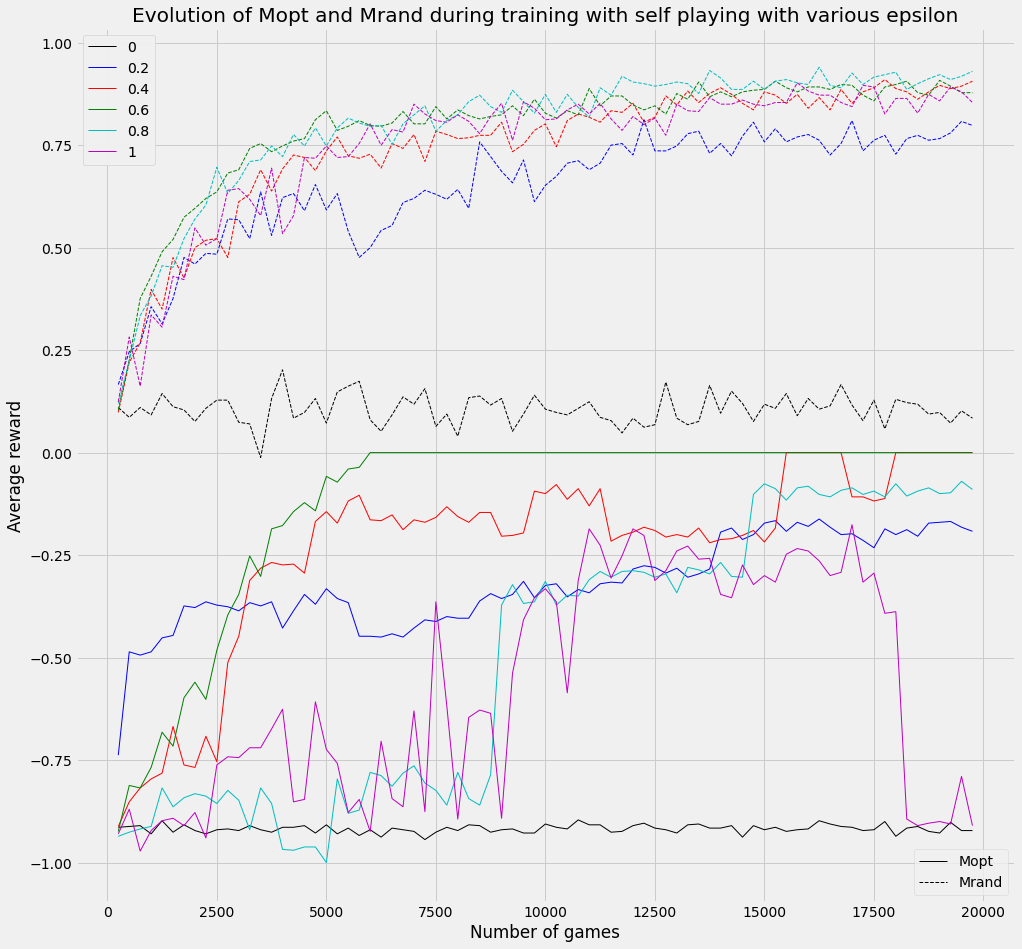

In [15]:
# Plot the results
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training with self playing with various epsilon')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt7[1]))*250+250
for Mopt, Mrand in zip(recap_Mopt7, recap_Mrand7):
#     pyplot.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], epsilons, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()


### Question 8

In [5]:
nb_play = 20000
decreasing_exploration_rates = [1, 250, 1000, 5000,10000, 20000, 40000]
Mopt = []
Mrand = []
recap_Mopt8 = []
recap_Mrand8 = []
Turns = np.array(['X','O'])

for decreasing_exploration_rate in decreasing_exploration_rates:
    print("testing now with decreasing exploration rate=", decreasing_exploration_rate)
    Qplayer = QLearning.QLearningSelf_Player(decreasing_exploration_rate = decreasing_exploration_rate, 
                                        decreasing_exploration_flag = True)
    for k in range(nb_play):
        grid, _, __ = env.observe()
        for j in range(9):
                move = Qplayer.act(grid,env.current_player, train_mode=True)
    
                grid, end, winner = env.step(move, print_grid=False)
    
                if end:
                    if winner=='X':
                        Qplayer.last_update(1,'X')
                        Qplayer.last_update(-1,'O')
                    elif winner=='O':
                        Qplayer.last_update(-1,'X')
                        Qplayer.last_update(1,'O')
                    else: 
                        Qplayer.last_update(0,'X')
                        Qplayer.last_update(0,'O')
                        
                    env.reset()
                    break     
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_self_playing_policy(Qplayer, expert_exploration_level=0))
            Mrand.append(test_functions.test_self_playing_policy(Qplayer, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt8.append(Mopt) 
    recap_Mrand8.append(Mrand) 

    Mopt=[]
    Mrand=[]

<>:34: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:34: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Usuario\AppData\Local\Temp/ipykernel_19748/1372026565.py:34: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not k%250 and k is not 0 :


testing now with decreasing exploration rate= 1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 250
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 1000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 5000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 10000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now with decreasing exploration rate= 20000
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epo

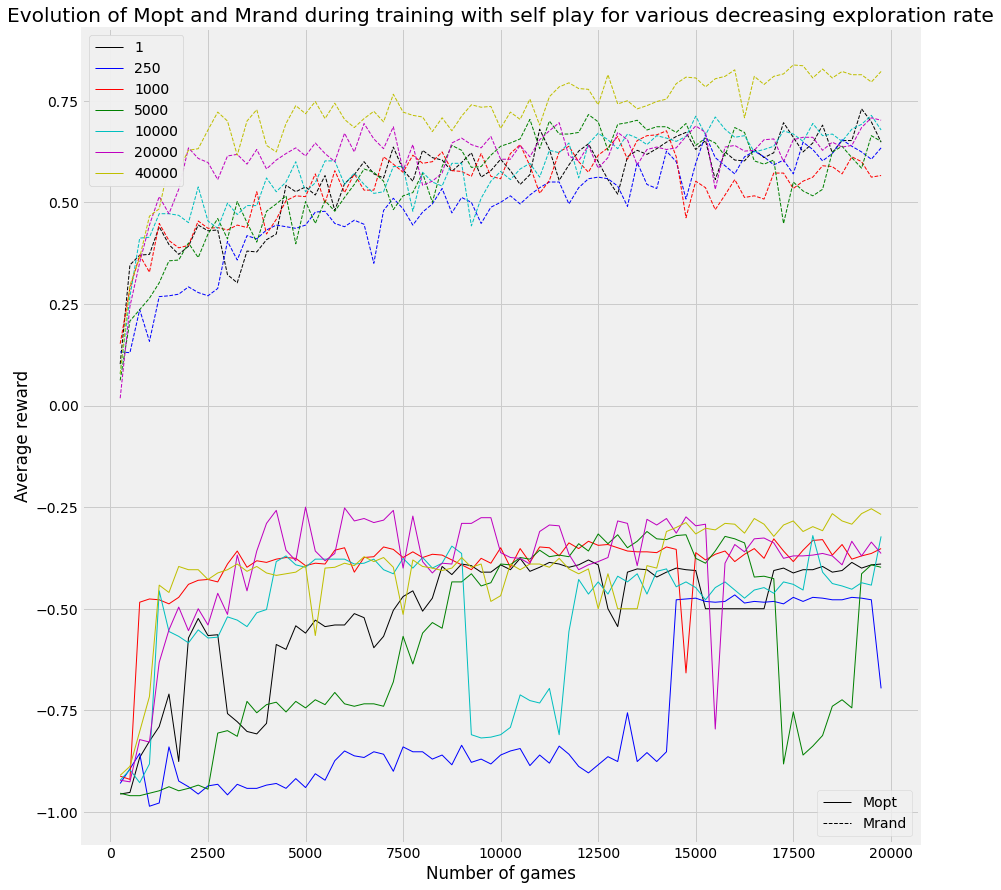

In [6]:
# Plot the results
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training with self play for various decreasing exploration rate')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt8[1]))*250+250
for Mopt, Mrand in zip(recap_Mopt8, recap_Mrand8):
#     pyplot.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], decreasing_exploration_rates, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()

### Question 9 

In [12]:
maxi = []
for l in recap_Mopt8:
    maxi.append(max(l))
    
print("Max value of Mopt acheived after 20000 games: ",max(maxi))

maxi = []
for l in recap_Mrand8:
    maxi.append(max(l))
print("Max value of Mrand acheived after 20000 games: ",max(maxi))

Max value of Mopt acheived after 20000 games:  -0.25
Max value of Mrand acheived after 20000 games:  0.838


### Question 10 


In [213]:
Bestplayer = QLearning.QLearningSelf_Player(exploration_level = 0.6)
for k in range(20000):
    grid, _, __ = env.observe()
    for j in range(9):
            move = Qplayer.act(grid,env.current_player, train_mode=True)

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                if winner=='X':
                    Qplayer.last_update(1,'X')
                    Qplayer.last_update(-1,'O')
                elif winner=='O':
                    Qplayer.last_update(-1,'X')
                    Qplayer.last_update(1,'O')
                else: 
                    Qplayer.last_update(0,'X')
                    Qplayer.last_update(0,'O')

                env.reset()
                break 
    if not k%2000:
        print('epoch: '+str(k))
        
print(test_functions.test_self_playing_policy(Bestplayer, expert_exploration_level=0))
print(test_functions.test_self_playing_policy(Bestplayer, expert_exploration_level=1))

    

epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
0.0
0.914


<AxesSubplot:title={'center':'QValues corresponding to an "fork" scenario'}>

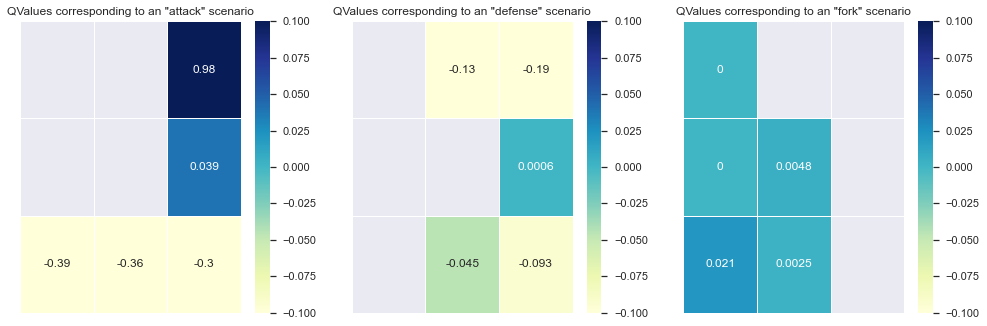

In [227]:
import seaborn as sns
plt.style.use("seaborn")

#states = Qplayer.states

board = np.array([[1., 1., 0.],
                  [-1., -1., 0.],
                  [0., 0., 0.]])


key = board.tobytes()
QValues1 = states[key]

board = np.array([[1., 0., 0.],
                  [-1., -1., 0.],
                  [1., 0., 0.]])

key = board.tobytes()
QValues2 = states[key]

board = np.array([[0., -1., 1.],
                  [0., 0., -1.],
                  [0., 0., 1.]])

key = board.tobytes()
QValues3 = states[key]

sns.set()

fig, axes = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

axes[0].title.set_text('QValues corresponding to an "attack" scenario')
sns.heatmap(QValues1,linewidth = 1 , annot = True, ax=axes[0], xticklabels=False, yticklabels=False, cmap="YlGnBu")
axes[1].title.set_text('QValues corresponding to an "defense" scenario')
sns.heatmap(QValues2,linewidth = 1 , annot = True, ax=axes[1], xticklabels=False, yticklabels=False, cmap="YlGnBu")
axes[2].title.set_text('QValues corresponding to an "fork" scenario')
sns.heatmap(QValues3,linewidth = 1 , annot = True, ax=axes[2], xticklabels=False, yticklabels=False, cmap="YlGnBu")


# 3 Deep Q-Learning


In [ ]:
nb_play = 20000
exploration_levels = [0.1]
average_reward = []
recap_rewards32 = []
recap_Mopt32 = []
recap_Mrand32 = []
Turns = np.array(['X','O'])
rewards=0
Mopt=[]
Mrand=[]
for exploration_level in exploration_levels:
    print("testing now DQN with exploration level=", exploration_level)
    DQN_player = Deep_QLearning.newDQN_Player(exploration_level= exploration_level)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        DQN_player.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                Valid_move_flag, move, loss = DQN_player.act(grid, train_mode=True)
            
            #if the move played by our player is not available, 
            #the game is stopped and the reward=-1
            if Valid_move_flag:
                grid, end, winner = env.step(move, print_grid=False)     
            else:
                reward = -1
                DQN_player.last_update(reward)
                env.reset()
                break
            
            if end:
                if winner==DQN_player.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0
                DQN_player.last_update(reward)
                env.reset()
                break
                
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_DQN_policy(DQN_player, expert_exploration_level=0))
            Mrand.append(test_functions.test_DQN_policy(DQN_player, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt32.append(Mopt) 
    recap_Mrand32.append(Mrand) 

    Mopt=[]
    Mrand=[]

In [ ]:
# Plot the results
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training for deep Q-Learning')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt32[0]))*250+250
for Mopt, Mrand in zip(recap_Mopt32, recap_Mrand32):
    #plt.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], exploration_levels, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()

## 3.2 Learning from experts

### Question 11

In [54]:
nb_play = 20000
exploration_levels = [0.1]
average_reward = []
average_loss = []
recap_rewards32 = []
recap_loss32 = []
Turns = np.array(['X','O'])
rewards=0
losses = 0

for exploration_level in exploration_levels:
    print("testing now DQN with exploration level=", exploration_level)
    DQN_player = Deep_QLearning.newDQN_Player(exploration_level= exploration_level)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        DQN_player.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                Valid_move_flag, move, loss = DQN_player.act(grid, train_mode=True)
                
            #if the move played by our player is not available, 
            #the game is stopped and the reward=-1
            if Valid_move_flag:
                grid, end, winner = env.step(move, print_grid=False)     
            else:
                reward = -1
                DQN_player.last_update(reward)
                env.reset()
                break
            
            if end:
                if winner==DQN_player.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0
                DQN_player.last_update(reward)
                env.reset()
                break
        
        rewards += reward
        losses += loss
        
        #every 250 games, average the rewards and store them
        if not k%250 and k is not 0 :
            average_reward.append(rewards/250)
            average_loss.append(losses/250)
            rewards=0
            losses = 0
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_rewards32.append(average_reward) 
    recap_loss32.append(average_loss) 
    
    average_reward=[]
    average_loss = []

<>:53: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:53: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Usuario\AppData\Local\Temp/ipykernel_79324/1049917606.py:53: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not k%250 and k is not 0 :


testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000


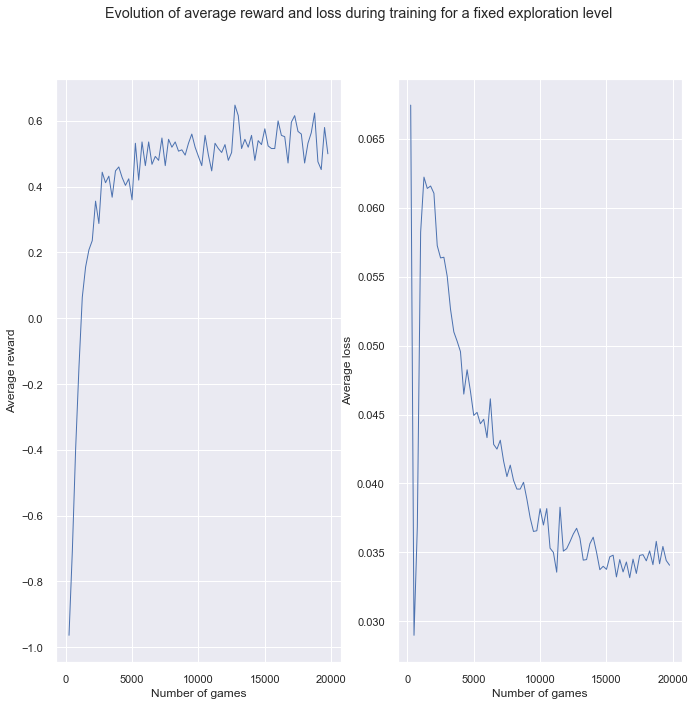

In [55]:
import seaborn as sns
plt.style.use("seaborn")

# Plot the results
sns.set()

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(10)

x = np.arange(len(recap_rewards32[0]))*250+250
fig.suptitle('Evolution of average reward and loss during training for a fixed exploration level')
for recap_reward, exploration_level in zip(recap_rewards32, exploration_levels):
    #axes[0].title.set_text('Evolution of average reward during training for various exploration level')
    axes[0].plot(x, recap_reward, label = "exploration_level= "+str(exploration_level), linewidth=1)
    axes[0].set(xlabel= 'Number of games', ylabel='Average reward')
    
for recap_loss, exploration_level in zip(recap_loss32, exploration_levels):
    #axes[1].title.set_text('Evolution of average reward during training for various exploration level')
    axes[1].plot(x, recap_loss, label = "exploration_level= "+str(exploration_level), linewidth=1)   
    axes[1].set(xlabel= 'Number of games', ylabel='Average loss')



### Prendre en compte remlpissage du buffer, donc au debut loss est 0 tout le temps + should we set batch to parameter so that this image work in real? now it just work because I harcode self.batch_size before running the cell

### Question 12

In [59]:
nb_play = 20000
exploration_levels = [0.1]
average_reward = []
average_loss = []
recap_rewards12 = []
recap_loss12 = []
Turns = np.array(['X','O'])
rewards=0
losses = 0

for exploration_level in exploration_levels:
    print("testing now DQN with exploration level=", exploration_level)
    DQN_player = Deep_QLearning.newDQN_Player(exploration_level= exploration_level)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        DQN_player.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                Valid_move_flag, move, loss = DQN_player.act(grid, train_mode=True)
                
            #if the move played by our player is not available, 
            #the game is stopped and the reward=-1
            if Valid_move_flag:
                grid, end, winner = env.step(move, print_grid=False)     
            else:
                reward = -1
                DQN_player.last_update(reward)
                env.reset()
                break
            
            if end:
                if winner==DQN_player.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0
                DQN_player.last_update(reward)
                env.reset()
                break
        
        rewards += reward
        losses += loss
        
        #every 250 games, average the rewards and store them
        if not k%250 and k is not 0 :
            average_reward.append(rewards/250)
            average_loss.append(losses/250)
            rewards=0
            losses = 0
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_rewards12.append(average_reward) 
    recap_loss12.append(average_loss) 
    
    average_reward=[]
    average_loss = []

<>:53: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:53: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Usuario\AppData\Local\Temp/ipykernel_79324/247857111.py:53: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not k%250 and k is not 0 :


testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000


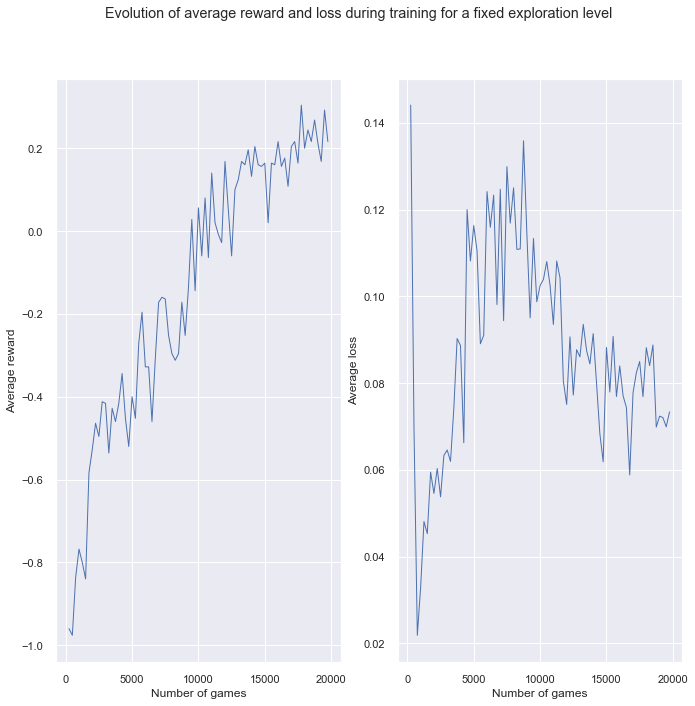

In [61]:
import seaborn as sns
plt.style.use("seaborn")

# Plot the results
sns.set()

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(10)

x = np.arange(len(recap_rewards12[0]))*250+250
fig.suptitle('Evolution of average reward and loss during training for a fixed exploration level')
for recap_reward, exploration_level in zip(recap_rewards12, exploration_levels):
    #axes[0].title.set_text('Evolution of average reward during training for various exploration level')
    axes[0].plot(x, recap_reward, label = "exploration_level= "+str(exploration_level), linewidth=1)
    axes[0].set(xlabel= 'Number of games', ylabel='Average reward')
    
for recap_loss, exploration_level in zip(recap_loss12, exploration_levels):
    #axes[1].title.set_text('Evolution of average reward during training for various exploration level')
    axes[1].plot(x, recap_loss, label = "exploration_level= "+str(exploration_level), linewidth=1)   
    axes[1].set(xlabel= 'Number of games', ylabel='Average loss')



### Question 13

In [62]:
nb_play = 20000
decreasing_exploration_rates = [1, 250, 1000, 5000,10000, 20000, 40000]
recap_Mopt13 = []
recap_Mrand13 = []
Turns = np.array(['X','O'])
Mopt=[]
Mrand=[]

for decreasing_exploration_rate in decreasing_exploration_rates:
    print("testing now DQN with decreasing exploration rate=", decreasing_exploration_rate)
    DQN_player = Deep_QLearning.newDQN_Player(decreasing_exploration_rate = decreasing_exploration_rate, 
                                        decreasing_exploration_flag = True)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        DQN_player.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=0.5, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                Valid_move_flag, move, loss = DQN_player.act(grid, train_mode=True)
            
            #if the move played by our player is not available, 
            #the game is stopped and the reward=-1
            if Valid_move_flag:
                grid, end, winner = env.step(move, print_grid=False)     
            else:
                reward = -1
                DQN_player.last_update(reward)
                env.reset()
                break
            
            if end:
                if winner==DQN_player.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0
                DQN_player.last_update(reward)
                env.reset()
                break
                
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_DQN_policy(DQN_player, expert_exploration_level=0))
            Mrand.append(test_functions.test_DQN_policy(DQN_player, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt13.append(Mopt) 
    recap_Mrand13.append(Mrand) 

    Mopt=[]
    Mrand=[]

<>:49: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:49: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Usuario\AppData\Local\Temp/ipykernel_79324/1843297834.py:49: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not k%250 and k is not 0 :


testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
testing now DQN with exploration level= 0.1
epoch: 0
epoch: 2000
epoch: 4000
epoch: 6000
epoch: 8000
epoch: 10000
epoch: 12000
epoch: 14000
epoch: 16000
epoch: 18000
test

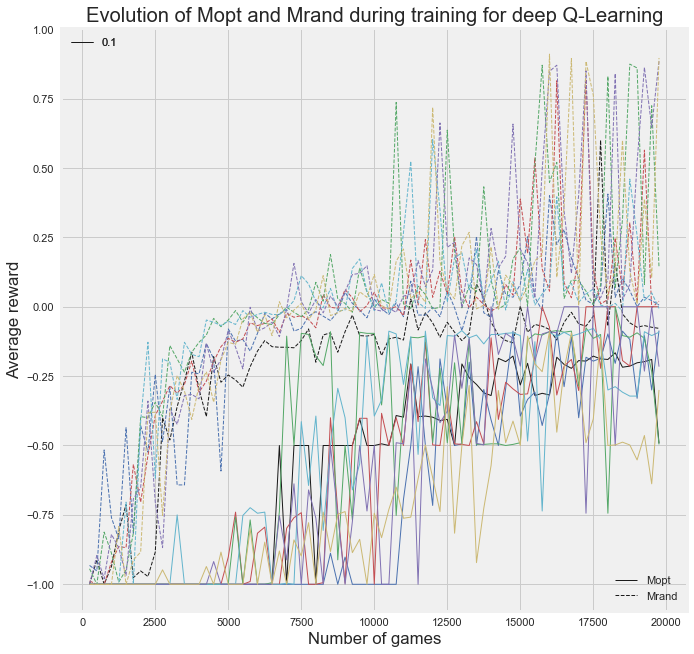

In [64]:
# Plot the results
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training for deep Q-Learning')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt13[0]))*250+250
for Mopt, Mrand in zip(recap_Mopt13, recap_Mrand13):
    #plt.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], exploration_levels, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()

### Question 14

In [ ]:
nb_play = 20000
optimal_player_epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
decreasing_exploration_rate = 250
Mopt = []
Mrand = []
recap_Mopt14 = []
recap_Mrand14 = []
Turns = np.array(['X','O'])

for optimal_player_epsilon in optimal_player_epsilons:
    print("testing now with optimal opponant's epsilon value =", optimal_player_epsilon)
    Qplayer = QLearning.newDQN_Player(decreasing_exploration_rate = decreasing_exploration_rate, 
                                        decreasing_exploration_flag = True)
    for k in range(nb_play):
        grid, _, __ = env.observe()

        #switch the 1st player after every game.
        current_turns = Turns[np.array([k%2, (k+1)%2])]
        Qplayer.set_player(player=current_turns[0])
        player_opt = OptimalPlayer(epsilon=optimal_player_epsilon, player=current_turns[1]) 

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = Qplayer.act(grid, train_mode=True)
            grid, end, winner = env.step(move, print_grid=False)
            if end:
                if winner==Qplayer.player:
                    reward = 1
                elif winner==player_opt.player:
                    reward = -1
                else: 
                    reward = 0                  
                Qplayer.last_update(reward)
                env.reset()
                break        
        #every 250 games, compute Mrand and Mopt
        if not k%250 and k is not 0 :
            Mopt.append(test_functions.test_policy(Qplayer, expert_exploration_level=0))
            Mrand.append(test_functions.test_policy(Qplayer, expert_exploration_level=1))
            
        if not k%2000:
            print('epoch: '+str(k))
    
    recap_Mopt14.append(Mopt) 
    recap_Mrand14.append(Mrand) 

    Mopt=[]
    Mrand=[]

In [ ]:
# Plot the results
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.style.use('fivethirtyeight')
plt.title('Evolution of Mopt and Mrand during training against an opponant with various epsilon')

colors = ['k','b', 'r', 'g', 'c', 'm', 'y']
cc = itertools.cycle(colors)
plot_lines = []

x = np.arange(len(recap_Mopt14[1]))*250+250
for Mopt, Mrand in zip(recap_Mopt14, recap_Mrand14):
#     pyplot.hold(True)
    c = next(cc)
    l1, = plt.plot(x, Mopt, '-', color=c,linewidth=1)
    l2, = plt.plot(x, Mrand, '--', color=c, linewidth=1)

    plot_lines.append([l1, l2])

legend1 = plt.legend(plot_lines[0], ["Mopt", "Mrand"], loc='lower right')
legend2 = plt.legend([l[0] for l in plot_lines], optimal_player_epsilons, loc='upper left')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.xlabel('Number of games')
plt.ylabel('Average reward')
plt.show()


### Question 15

In [ ]:
maxi = []
for l in recap_Mopt14:
    maxi.append(max(l))
    
print("Max value of Mopt acheived after 20000 games: ",max(maxi))

maxi = []
for l in recap_Mrand14:
    maxi.append(max(l))
print("Max value of Mrand acheived after 20000 games: ",max(maxi))